In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", 100)

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score , classification_report# precision_score, recall_score, accuracy_score
# , f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
adult = pd.read_csv('adultUpdated.csv')
# adult = pd.read_csv('adult.csv')
print(adult.shape)
adult.head(5)

(30725, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
1,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
2,57,Federal-gov,337895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K
3,50,Federal-gov,251585,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,>50K
4,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K


In [3]:
for col in adult.columns.to_list():
    if len(adult[col].value_counts().sort_values())<20:
        print(f'____________ {col} ____________')
        print(adult[col].value_counts())
        print('\n')

____________ workclass ____________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


____________ education ____________
 HS-grad         9969
 Some-college    6777
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64


____________ education-num  ____________
9     9969
10    6777
13    5182
14    1675
11    1321
7     1057
12    1020
6      833
4      574
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: education-num , dtype: int64


____________ marital-status ____________
 

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          30725 non-null  int64 
 3   education       30725 non-null  object
 4   education-num   30725 non-null  int64 
 5   marital-status  30725 non-null  object
 6   occupation      30725 non-null  object
 7   relationship    30725 non-null  object
 8   race            30725 non-null  object
 9   sex             30725 non-null  object
 10  capital-gain    30725 non-null  int64 
 11  capital-loss    30725 non-null  int64 
 12  hours-per-week  30725 non-null  int64 
 13  native-country  30725 non-null  object
 14  salary          30725 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [5]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30725.0,38.439512,13.119665,17.0,28.0,37.0,47.0,90.0
fnlwgt,30725.0,189853.780146,105458.534626,13769.0,117833.0,178517.0,237317.0,1484705.0
education-num,30725.0,10.129699,2.562702,1.0,9.0,10.0,13.0,16.0
capital-gain,30725.0,1105.785094,7497.027762,0.0,0.0,0.0,0.0,99999.0
capital-loss,30725.0,88.889959,405.613208,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30725.0,40.946461,11.987385,1.0,40.0,40.0,45.0,99.0


In [6]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          30725 non-null  int64 
 3   education       30725 non-null  object
 4   education-num   30725 non-null  int64 
 5   marital-status  30725 non-null  object
 6   occupation      30725 non-null  object
 7   relationship    30725 non-null  object
 8   race            30725 non-null  object
 9   sex             30725 non-null  object
 10  capital-gain    30725 non-null  int64 
 11  capital-loss    30725 non-null  int64 
 12  hours-per-week  30725 non-null  int64 
 13  native-country  30725 non-null  object
 14  salary          30725 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [7]:
numdf = adult.select_dtypes(include=['number'])
numdf

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,35,76845,5,0,0,40
1,30,59951,10,0,0,40
2,57,337895,13,0,0,40
3,50,251585,13,0,0,55
4,43,410867,16,0,0,50
...,...,...,...,...,...,...
30720,29,212588,10,0,0,65
30721,72,121004,9,0,0,55
30722,68,174695,10,0,0,25
30723,67,137192,9,0,0,12


________ age ________


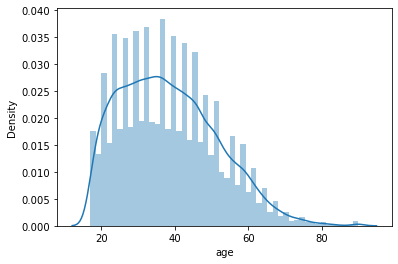



________ fnlwgt ________


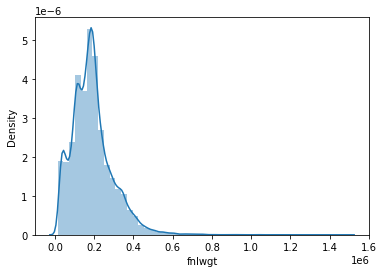



________ education-num  ________


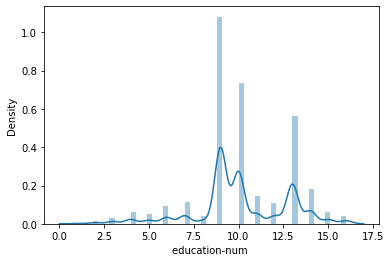



________ capital-gain ________


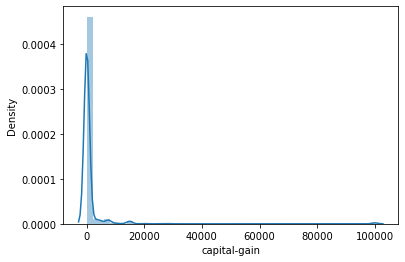



________ capital-loss ________


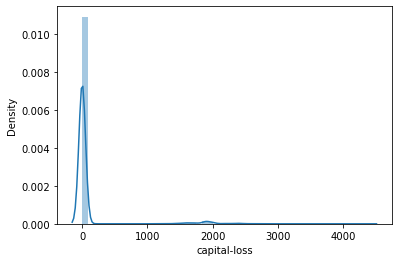



________ hours-per-week ________


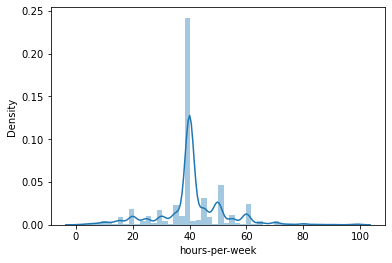

In [8]:
for col in numdf.columns:
    print("________",col,"________")
#     sns.boxplot(data=numdf,x=col);
#     plt.show();
    sns.distplot(numdf[col]);
    plt.show();
    print('\n')

In [9]:
objdf = adult.select_dtypes(include=['object'])
objdf

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,Federal-gov,9th,Married-civ-spouse,Farming-fishing,Husband,Black,Male,United-States,<=50K
1,Federal-gov,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Male,United-States,<=50K
2,Federal-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States,>50K
3,Federal-gov,Bachelors,Divorced,Exec-managerial,Not-in-family,White,Male,United-States,>50K
4,Federal-gov,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
...,...,...,...,...,...,...,...,...,...
30720,Without-pay,Some-college,Married-civ-spouse,Farming-fishing,Own-child,White,Male,United-States,<=50K
30721,Without-pay,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,United-States,<=50K
30722,Without-pay,Some-college,Married-spouse-absent,Farming-fishing,Unmarried,White,Female,United-States,<=50K
30723,Without-pay,HS-grad,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,Philippines,<=50K


________ workclass ________


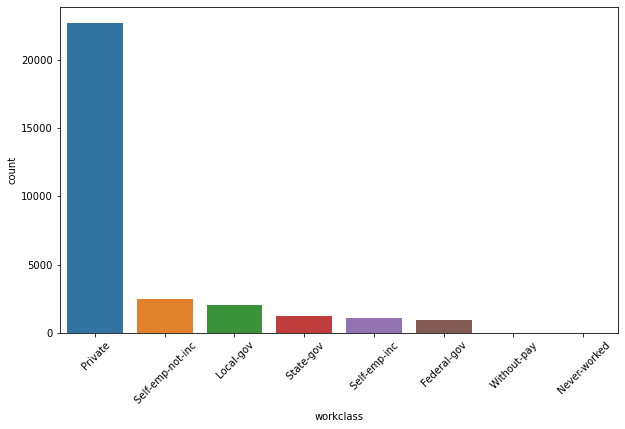



________ education ________


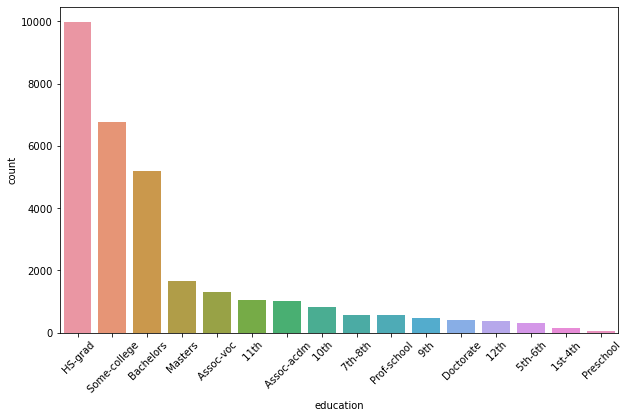



________ marital-status ________


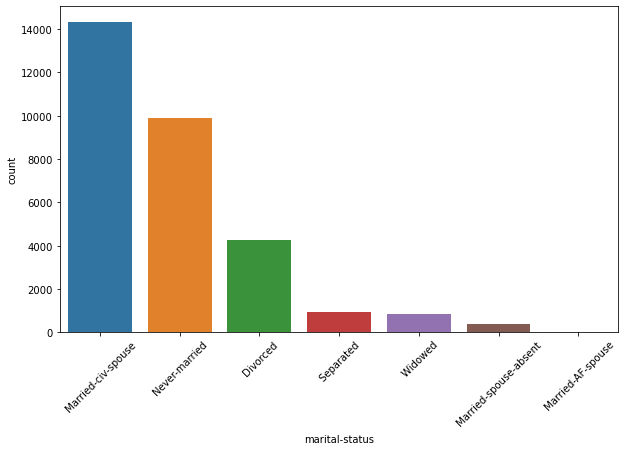



________ occupation ________


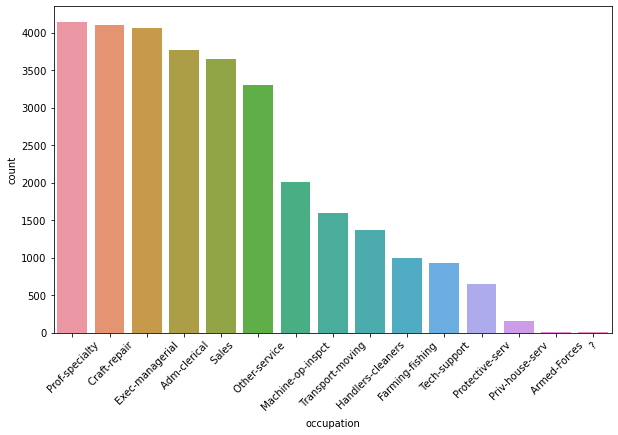



________ relationship ________


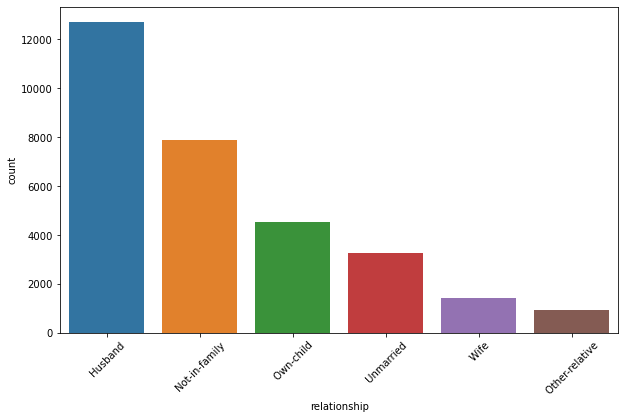



________ race ________


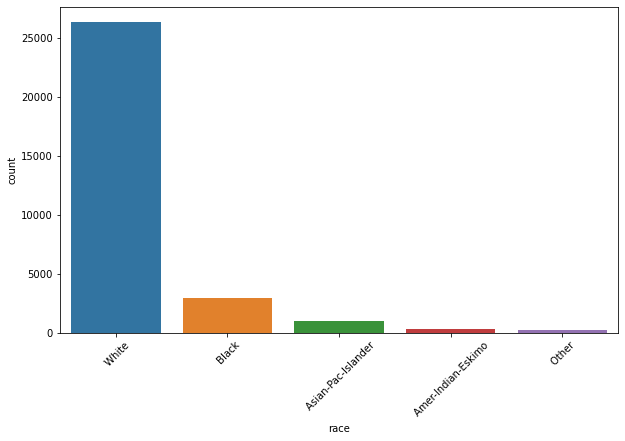



________ sex ________


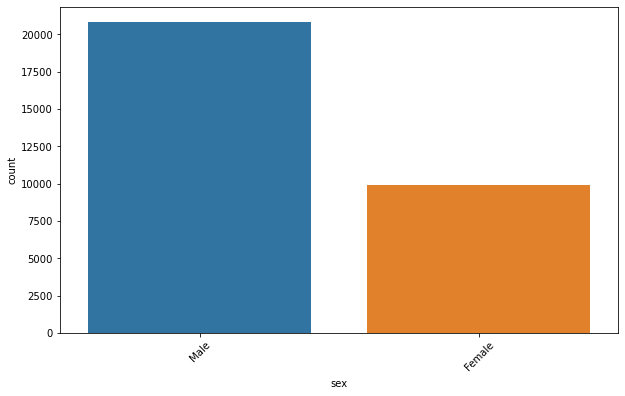



________ native-country ________


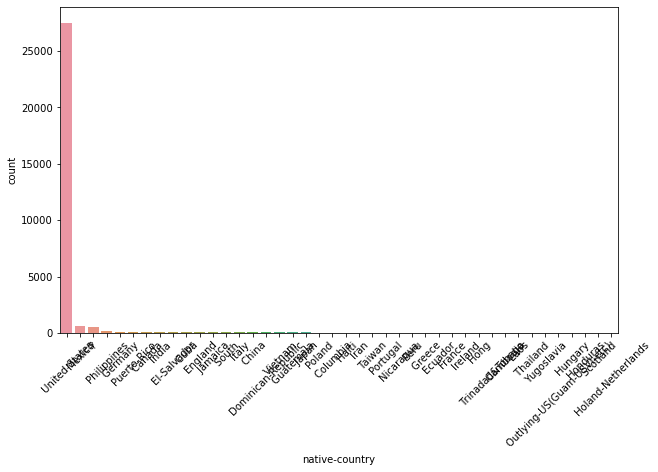



________ salary ________


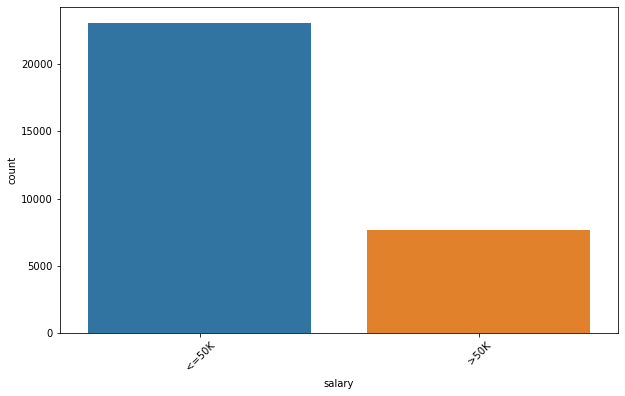

In [10]:
for col in objdf.columns:
    print("________",col,"________")
#     sns.boxplot(data=numdf,x=col);
#     plt.show();
    plt.figure(figsize= (10,6))
    sns.countplot(objdf[col] ,order = objdf[col].value_counts().index);
    plt.xticks(rotation=45)
    plt.show();
    print('\n')

In [11]:
adult.drop_duplicates(inplace=True)

In [12]:
train, test = train_test_split(adult, test_size=0.2,random_state=9110)

In [13]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [14]:
covtoNA_train = train.copy()
covtoNA_test = test.copy()

covtoNA_train.replace('?',np.nan,inplace=True)
covtoNA_test.replace('?',np.nan,inplace=True)

covtoNA_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [15]:
droped_train = covtoNA_train.copy()
droped_test = covtoNA_test.copy()

droped_train.dropna(inplace=True)
droped_test.dropna(inplace=True)

In [16]:
replaced_test = train.copy()
replaced_train = test.copy()
for col in [ 'workclass' ,'occupation' , 'native-country']:
    replaced_test[col].replace('?',replaced_test[col].mode()[0],inplace=True)
    replaced_train[col].replace('?',replaced_test[col].mode()[0],inplace=True)

In [17]:
dataFrames =[train,test]
train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

dataFrames =[covtoNA_train,covtoNA_test]
covtoNA_train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
covtoNA_test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

dataFrames =[droped_train,droped_test]
droped_train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
droped_test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

dataFrames =[replaced_train,replaced_test]
replaced_train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
replaced_test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

In [18]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 9110)
param_grid = {'max_depth': [*range(6,11)],'criterion':['gini', 'entropy']}

print("Classification where leave them as ?")
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

print("____________________________________________________")
print("Classification where convert ? to NA")
X = covtoNA_train.iloc[:, :-1].values
y = covtoNA_train.iloc[:, -1].values
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

print("____________________________________________________")
print("Classification where drop the na values (?)")
X = droped_train.iloc[:, :-1]
y = droped_train.iloc[:, -1]
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

print("____________________________________________________")
print("Classification where replace ? with mode")
X = replaced_train.iloc[:, :-1]
y = replaced_train.iloc[:, -1]
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

Classification where leave them as ?
{'criterion': 'entropy', 'max_depth': 8}
0.8535016286644952
____________________________________________________
Classification where convert ? to NA
{'criterion': 'entropy', 'max_depth': 8}
0.8535016286644952
____________________________________________________
Classification where drop the na values (?)
{'criterion': 'entropy', 'max_depth': 8}
0.8535016286644952
____________________________________________________
Classification where replace ? with mode
{'criterion': 'entropy', 'max_depth': 6}
0.8324359997137579


In [19]:
print("Classification where leave them as ?")
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
final_model = GS.best_estimator_
final_model.fit(X,y)
y_pred_test = final_model.predict(test.iloc[:, :-1])
print(classification_report( test.iloc[:, -1],y_pred_test))

Classification where leave them as ?
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4559
           1       0.78      0.54      0.64      1582

    accuracy                           0.84      6141
   macro avg       0.82      0.74      0.77      6141
weighted avg       0.84      0.84      0.83      6141

